# Decision Trees and Random Forests Project

### **Part 1:** Create a decision tree model of the Titanic dataset

### **Part 2:** Create a random forest model of the Titanic dataset that predicts survival

# ----------------------------------------------------------------------

## **Part 1:** Create a decision tree model of the Titanic dataset to predict survival
**Tasks:**
1. Import Packages
2. Load in Data
3. Data Wrangling
4. Train Test Split
5. Create Initial Decision Tree
6. Assess the Model

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Load in Data
Titanic = sns.load_dataset('titanic')
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#Data Wrangling

titanicTrim = Titanic.drop(["sibsp", "parch", "class", "who", "adult_male", "embark_town", "alive"], axis = 1)
titanicTrim.head()

,survived,pclass,sex,age,fare,embarked,deck,alone
0,0,3,male,22.0,7.2500,S,NaN,False
1,1,1,female,38.0,71.2833,C,C,False
2,1,3,female,26.0,7.9250,S,NaN,True
3,1,1,female,35.0,53.1000,S,C,False
4,0,3,male,35.0,8.0500,S,NaN,True


In [4]:
titanicTrim.dropna(inplace=True)

In [5]:
titanicTrim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  182 non-null    int64   
 1   pclass    182 non-null    int64   
 2   sex       182 non-null    object  
 3   age       182 non-null    float64 
 4   fare      182 non-null    float64 
 5   embarked  182 non-null    object  
 6   deck      182 non-null    category
 7   alone     182 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(2), object(2)
memory usage: 10.7+ KB


In [6]:
def sexRecode (series):
    if series == "male":
        return 0
    if series == "female":
        return 1
    
titanicTrim["sexR"] = titanicTrim["sex"].apply(sexRecode)
titanicTrim.head()

,survived,pclass,sex,age,fare,embarked,deck,alone,sexR
1,1,1,female,38.0,71.2833,C,C,False,1
3,1,1,female,35.0,53.1000,S,C,False,1
6,0,1,male,54.0,51.8625,S,E,True,0
10,1,3,female,4.0,16.7000,S,G,False,1
11,1,1,female,58.0,26.5500,S,C,True,1


In [7]:
##Determine values of "embarked"
titanicTrim.value_counts("embarked")

embarked
S    115
C     65
Q      2
dtype: int64

In [8]:
def embarkedRecode (series):
    if series == "C":
        return 0
    if series == "S":
        return 1
    if series == "Q":
        return 2

titanicTrim["embarkedR"] = titanicTrim["embarked"].apply(embarkedRecode)
titanicTrim.head()

,survived,pclass,sex,age,fare,embarked,deck,alone,sexR,embarkedR
1,1,1,female,38.0,71.2833,C,C,False,1,0
3,1,1,female,35.0,53.1000,S,C,False,1,1
6,0,1,male,54.0,51.8625,S,E,True,0,1
10,1,3,female,4.0,16.7000,S,G,False,1,1
11,1,1,female,58.0,26.5500,S,C,True,1,1


In [9]:
titanicTrim.value_counts("deck")

deck
C    51
B    43
D    31
E    30
A    12
F    11
G     4
dtype: int64

In [10]:
def deckRecode (series):
    if series == "C":
        return 0
    if series == "B":
        return 1
    if series == "D":
        return 2
    if series == "E":
        return 3
    if series == "A":
        return 4
    if series == "F":
        return 5
    if series == "G":
        return 6

titanicTrim["deckR"] = titanicTrim["deck"].apply(deckRecode)
titanicTrim.head()

,survived,pclass,sex,age,fare,embarked,deck,alone,sexR,embarkedR,deckR
1,1,1,female,38.0,71.2833,C,C,False,1,0,0
3,1,1,female,35.0,53.1000,S,C,False,1,1,0
6,0,1,male,54.0,51.8625,S,E,True,0,1,3
10,1,3,female,4.0,16.7000,S,G,False,1,1,6
11,1,1,female,58.0,26.5500,S,C,True,1,1,0


In [11]:
titanicTrimmed = titanicTrim.drop(["sex", "embarked", "deck"], axis = 1)
titanicTrimmed.head()

,survived,pclass,age,fare,alone,sexR,embarkedR,deckR
1,1,1,38.0,71.2833,False,1,0,0
3,1,1,35.0,53.1000,False,1,1,0
6,0,1,54.0,51.8625,True,0,1,3
10,1,3,4.0,16.7000,False,1,1,6
11,1,1,58.0,26.5500,True,1,1,0


In [12]:
def survival (series):
    if series == 0:
        return "Died"
    if series == 1:
        return "Survived"

titanicTrimmed["survived"] = titanicTrim["survived"].apply(survival)
titanicTrimmed.head()

,survived,pclass,age,fare,alone,sexR,embarkedR,deckR
1,Survived,1,38.0,71.2833,False,1,0,0
3,Survived,1,35.0,53.1000,False,1,1,0
6,Died,1,54.0,51.8625,True,0,1,3
10,Survived,3,4.0,16.7000,False,1,1,6
11,Survived,1,58.0,26.5500,True,1,1,0


In [33]:
#recode into x and y variables
y = titanicTrimmed.survived
x = titanicTrimmed.drop("survived", axis = 1)

In [34]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4)

In [35]:
#Create decision tree
decisionTree = DecisionTreeClassifier()
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
#Assess the Model
##Predictions
treePredictions = decisionTree.predict(x_test)

In [37]:
print(confusion_matrix(y_test, treePredictions))

[[11 12]
 [ 9 41]]


In [38]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

        Died       0.55      0.48      0.51        23
    Survived       0.77      0.82      0.80        50

    accuracy                           0.71        73
   macro avg       0.66      0.65      0.65        73
weighted avg       0.70      0.71      0.71        73



## Decision Trees Conclusions

**Confusion Matrix:**
 - predicted 15 deaths when there were actually 20
 - predicted 43 survived when there were actually 53


**Classification Report:**
 - Our model was only 81% accurate at predicting survivals vs. 75% for deaths
 - Our model has a weighted average of 79% which is still good but I think can be improved

# __________________________________________________________________

## **Part 2:** Create a random forest model of the Titanic dataset that predicts survival

**Tasks:**
1. Import Packages - *completed above*
2. Load in Data - *completed above*
3. Data Wrangling - *completed above*
4. Train Test Split - *completed above*
5. Initial Random Forest Model
6. Evaluate Model Fit
7. Hyperparameter Tuning
8. Re-run Model
9. Run Feature Importance

In [19]:
#Create initial forest model
forest = RandomForestClassifier(n_estimators=500)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [20]:
#Evaluate Model Fit
##Predictions
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[15  9]
 [12 37]]
              precision    recall  f1-score   support

        Died       0.56      0.62      0.59        24
    Survived       0.80      0.76      0.78        49

    accuracy                           0.71        73
   macro avg       0.68      0.69      0.68        73
weighted avg       0.72      0.71      0.72        73



# Our model is 72% accurate for our weighted average
## - Let's run a hyperparameter tuning to try to find a better model

In [21]:
#Evaluate Number of Estimators
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.5753424657534246
4 : 0.6438356164383562
5 : 0.6712328767123288
8 : 0.6575342465753424
10 : 0.6712328767123288
20 : 0.7123287671232876
50 : 0.6986301369863014
75 : 0.684931506849315
100 : 0.6986301369863014
250 : 0.7123287671232876
500 : 0.7123287671232876


In [22]:
#250 numerators is our best fit
#Evaluate other features, depth & sample leafs
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [27]:
rf = RandomForestClassifier(n_estimators=20)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=20),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]})

In [28]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': None, 'max_depth': 40}

In [31]:
#Re-run Forest with new parameters
forest = RandomForestClassifier(n_estimators=20, min_samples_leaf=2, max_features=None, max_depth=40)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=40, max_features=None, min_samples_leaf=2,
                       n_estimators=20)

In [32]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[15  9]
 [13 36]]
              precision    recall  f1-score   support

        Died       0.54      0.62      0.58        24
    Survived       0.80      0.73      0.77        49

    accuracy                           0.70        73
   macro avg       0.67      0.68      0.67        73
weighted avg       0.71      0.70      0.70        73



# __________________________________________________________________

# Final Results

**Conclusions:**

1. Our 1st forest model without tuned hyperparameters is a better fit than the 2nd model
    - 500 was a good numerator for our model fit.
    - Survival predictions are 80% accurate while death predictions are 56% accurate
    - Our overall weighted average accuracy is 72%
                                           
                                           
2. Our Random forest model is slightly better than the original decision tree
    - Decision tree = 70% accurate (weighted avarage)
    - Random forest = 72% accurate (weighted average)
    
**3. For this dataset I would recommend using the random forest tree model for best survival predictions**

# ________________________________________________
### **For fun:** 
#### Let's see which variables have the biggest affect on our predictions

In [40]:
#Feature Importance - just to see which variables have more impact
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

sexR         0.399424
fare         0.221672
age          0.182160
deckR        0.134043
embarkedR    0.034361
alone        0.017029
pclass       0.011312
dtype: float64


<AxesSubplot:>

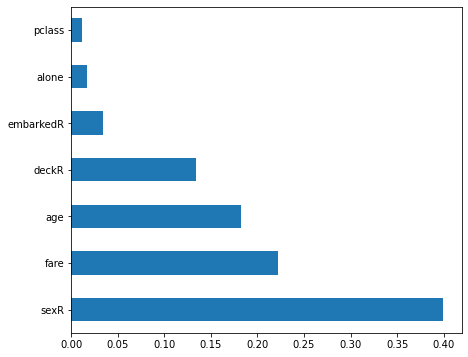

In [41]:
feature_importances.plot(kind='barh', figsize=(7,6))

## Most Important Features
1. Sex - plays the biggest role
2. Fare
3. Age
4. Deck

**Conclusion:** if you want to know who would survive, looking at sex, fare, age and which deck they were on would give you a good pridctor into whether they would survive.